In [1]:
%matplotlib inline

from nuscenes import NuScenes
# Load the dataset
nusc = NuScenes(version='v1.0-mini', dataroot='./data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.440 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
# View class statistics
nusc.list_lidarseg_categories(sort_by='count')

Calculating semantic point stats for nuScenes-lidarseg...
  1  animal                                   nbr_points=           0
  7  human.pedestrian.stroller                nbr_points=           0
  8  human.pedestrian.wheelchair              nbr_points=           0
 19  vehicle.emergency.ambulance              nbr_points=           0
 20  vehicle.emergency.police                 nbr_points=           0
 10  movable_object.debris                    nbr_points=          48
  6  human.pedestrian.police_officer          nbr_points=          64
  3  human.pedestrian.child                   nbr_points=         230
  4  human.pedestrian.construction_worker     nbr_points=       1,412
 14  vehicle.bicycle                          nbr_points=       1,463
 11  movable_object.pushable_pullable         nbr_points=       2,293
  5  human.pedestrian.personal_mobility       nbr_points=       4,096
 13  static_object.bicycle_rack               nbr_points=       4,476
 12  movable_object.trafficcone 

Sample 82


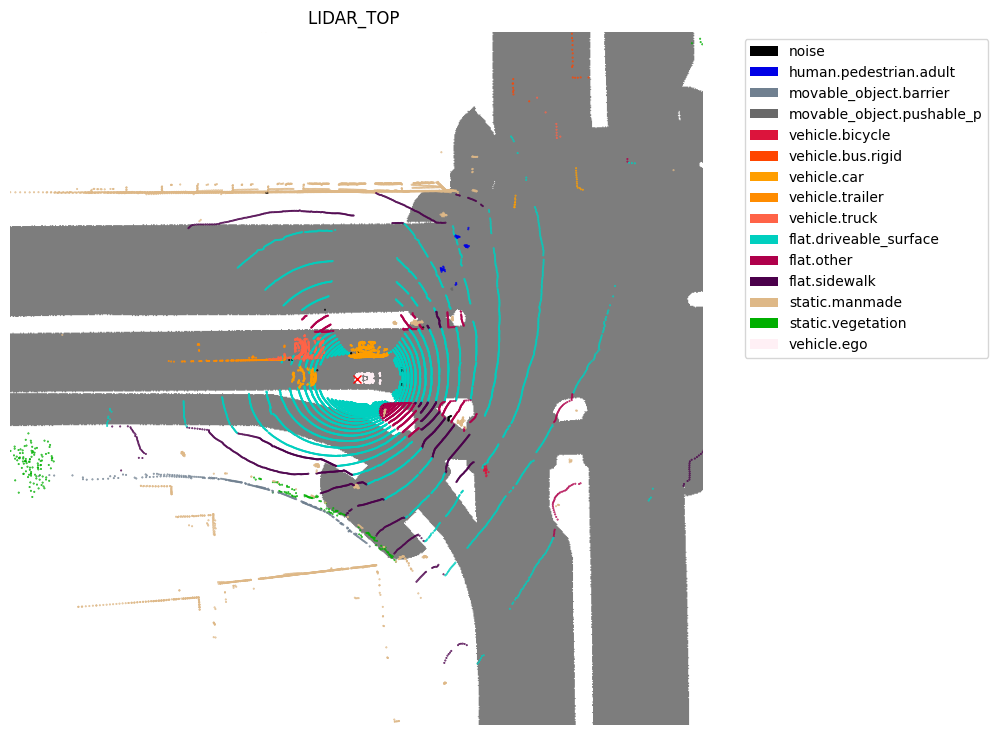

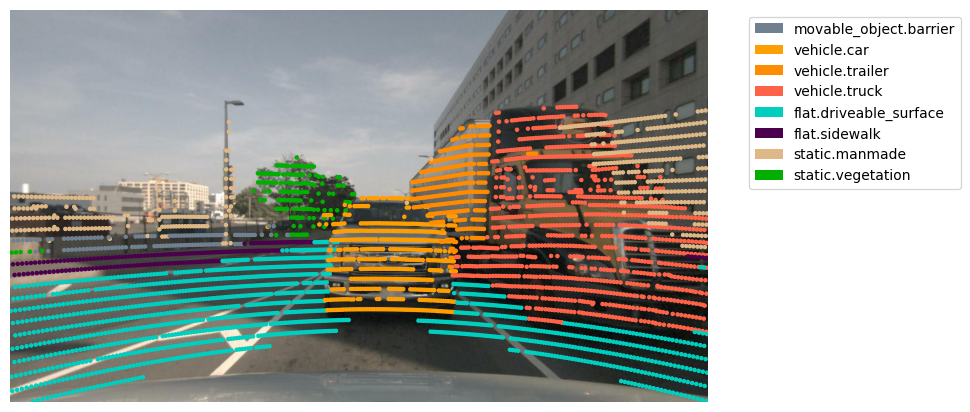

In [ ]:
# Visualize a random sample
import random

sample_i = random.randint(0, len(nusc.sample) - 1)
sample = nusc.sample[sample_i]
sample_data_token = sample["data"]["LIDAR_TOP"]
print(f"Sample {sample_i}")
# A top-level view of the lidar sample
nusc.render_sample_data(
    sample_data_token, with_anns=False, show_lidarseg=True, show_lidarseg_legend=True
)
# Point-cloud fused onto the camera image using the calibrated rotation,
# translation, and scaling matrices.
nusc.render_pointcloud_in_image(
    sample["token"],
    pointsensor_channel="LIDAR_TOP",
    camera_channel="CAM_BACK",
    render_intensity=False,
    show_lidarseg=True,
    show_lidarseg_legend=True,
)


In [7]:
# TODO: fine-tune a model on the data. Could fine-tune a CNN to do pixel-level segmentation
# using a 2D depth image take from the projected and interpolated LiDAR data and the 2D
# camera image. Or, could fine-tune a 3D occupancy network to classify in a 3D top-down view
# which cells in the grid are occupied, e.g. via https://arxiv.org/pdf/2310.11239.